In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import warnings

In [ ]:
# Data Preprocssing
Data = pd.read_csv("/content/drive/MyDrive/Datasets/melb_data.csv")

Data.dropna(subset=['Price'],axis=0,inplace=True)
y = Data.Price
x = Data.drop(['Price'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y)

numerical_columns = [cname for cname in x_train.columns if x_train[cname].dtype in ['float64', 'int64']]
categorical_columns = [cname for cname in x_train.columns if x_train[cname].dtype == 'object' and x_train[cname].nunique() < 10]

Final_cols = numerical_columns + categorical_columns

x_train = x_train[Final_cols]
x_test = x_test[Final_cols]
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
def get_score(n):
  model = XGBRegressor(n_estimators=n,learning_rate=0.1)
  model.fit(
      x_train,
      y_train,
      early_stopping_rounds = 5,
      verbose=False,
      eval_set = [(x_test,y_test)]
  )
  preds = model.predict(x_test)
  return mean_absolute_error(y_test,preds)


In [ ]:
import warnings
# Suppress the specific UserWarning from XGBoost
warnings.filterwarnings('ignore', category=UserWarning, message=".*early_stopping_rounds.*")
results = {}
for i in range(1,10):
  results[i*100] = get_score(i*100)


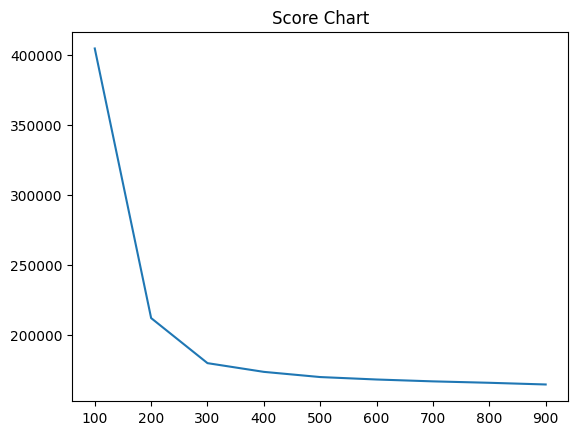

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(results.keys()),list(results.values()))
plt.xlabel = "Rounds"
plt.ylabel = "Scores"
plt.title("Score Chart")
plt.show()